# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import requests



from pprint import pprint
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



output_data_file = "output_data/cities.csv"

print(weather_api_key)

c814fd06541d5a7da030ffbac017e5b3


### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Fetch weather data for the city
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | thunder bay
Processing Record 6 of Set 1 | sovetskaya gavan'
Processing Record 7 of Set 1 | plettenberg bay
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | flin flon
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | katsuren-haebaru
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | langxiang
Processing Record 22 of Set 1

In [14]:
# Convert the cities weather data into a Pandas DataFrame




city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.41,60,62,12.94,NZ,1683875382
1,avarua,-21.2078,-159.7750,25.03,83,75,7.72,CK,1683875383
2,adamstown,-25.0660,-130.1015,22.32,65,100,8.04,PN,1683875383
3,edinburgh of the seven seas,-37.0676,-12.3116,17.29,89,100,13.01,SH,1683875384
4,thunder bay,48.4001,-89.3168,10.08,86,100,1.59,CA,1683875214


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.41,60,62,12.94,NZ,1683875382
1,avarua,-21.2078,-159.7750,25.03,83,75,7.72,CK,1683875383
2,adamstown,-25.0660,-130.1015,22.32,65,100,8.04,PN,1683875383
3,edinburgh of the seven seas,-37.0676,-12.3116,17.29,89,100,13.01,SH,1683875384
4,thunder bay,48.4001,-89.3168,10.08,86,100,1.59,CA,1683875214


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

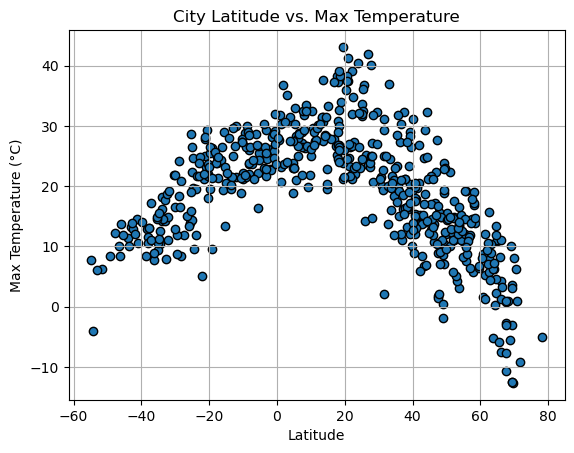

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

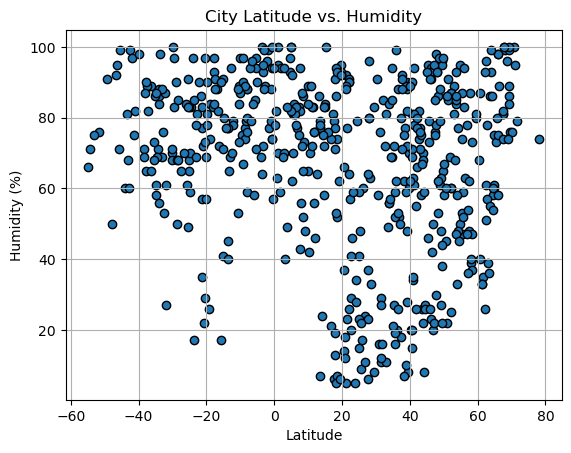

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

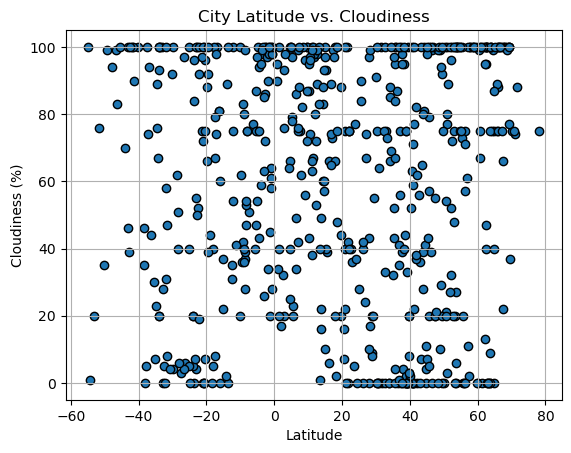

In [14]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

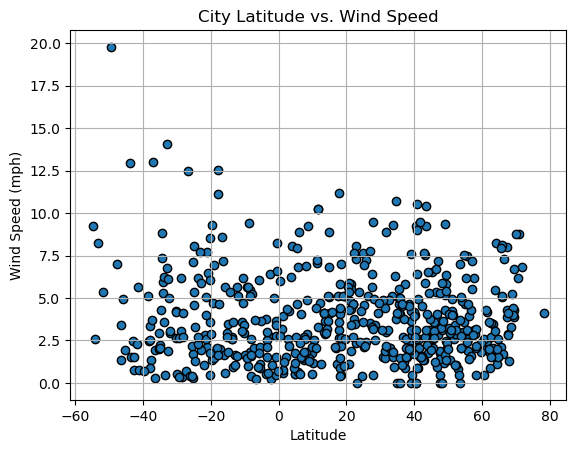

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black")
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-", linewidth=1)
    
    # Annotate the regression equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show the plot
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,thunder bay,48.4001,-89.3168,10.08,86,100,1.59,CA,1683875214
5,sovetskaya gavan',48.9723,140.2878,8.60,61,2,4.31,RU,1683875384
8,thompson,55.7435,-97.8558,7.56,59,100,1.89,CA,1683875388
9,flin flon,54.7682,-101.8650,10.91,50,100,3.57,CA,1683875388
10,iqaluit,63.7506,-68.5145,-5.15,86,100,1.54,CA,1683875388


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.41,60,62,12.94,NZ,1683875382
1,avarua,-21.2078,-159.7750,25.03,83,75,7.72,CK,1683875383
2,adamstown,-25.0660,-130.1015,22.32,65,100,8.04,PN,1683875383
3,edinburgh of the seven seas,-37.0676,-12.3116,17.29,89,100,13.01,SH,1683875384
6,plettenberg bay,-34.0527,23.3716,14.14,84,100,5.29,ZA,1683875386


###  Temperature vs. Latitude Linear Regression Plot

The r-value is :


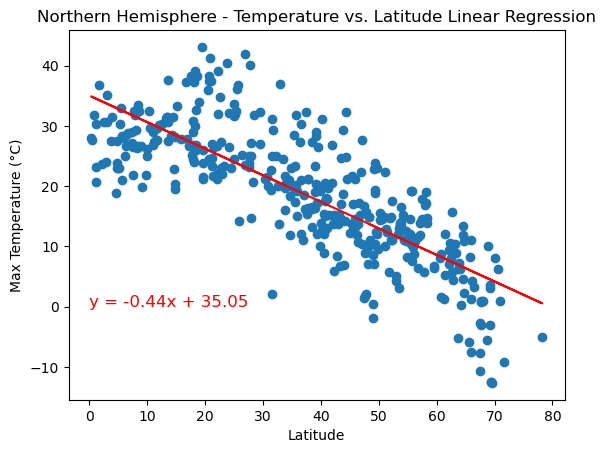

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the equation of the line on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print("The r-value is :", )
plt.annotate(equation, (0, 0), fontsize=12, color="red")

# Set plot properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Northern Hemisphere - Temperature vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Northern_Hemi_Temp_Lat_LR.png")

# Show plot
plt.show()

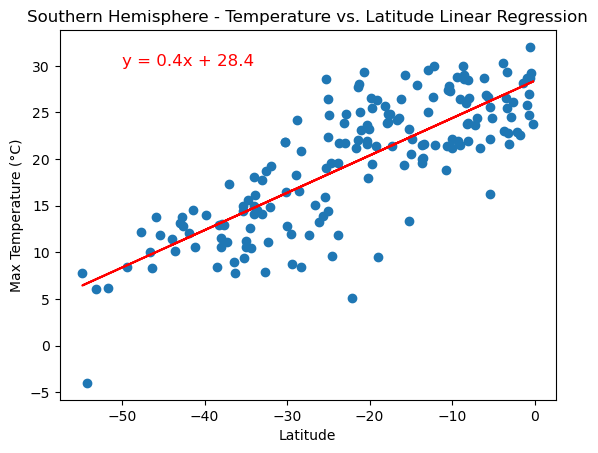

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the equation of the line on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (-50, 30), fontsize=12, color="red")

# Set plot properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Southern Hemisphere - Temperature vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Southern_Hemi_Temp_Lat_LR.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

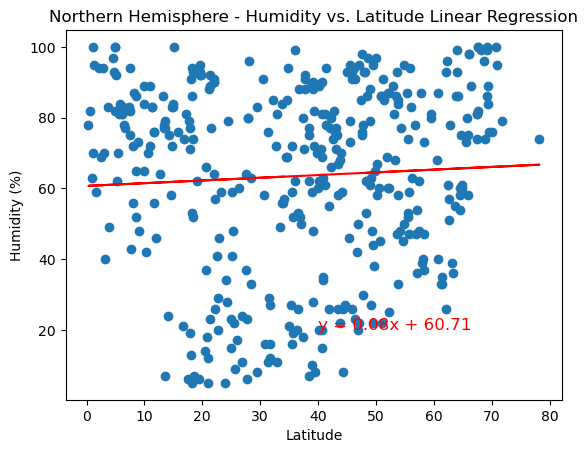

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the equation of the line on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (40, 20), fontsize=12, color="red")

# Set plot properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Northern_Hemi_Humidity_Lat_LR.png")

# Show plot
plt.show()

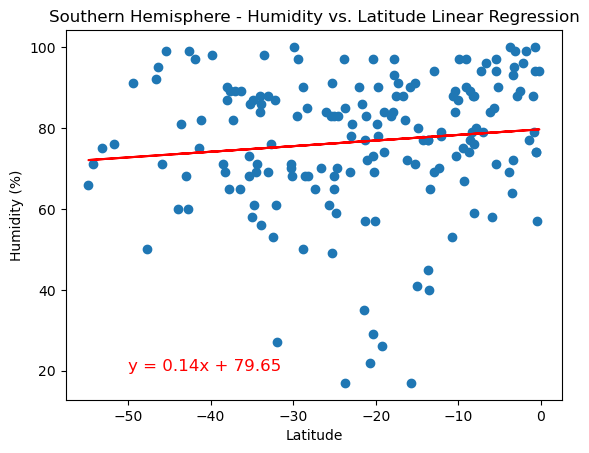

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the equation of the line on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (-50, 20), fontsize=12, color="red")

# Set plot properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Southern_Hemi_Humidity_Lat_LR.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

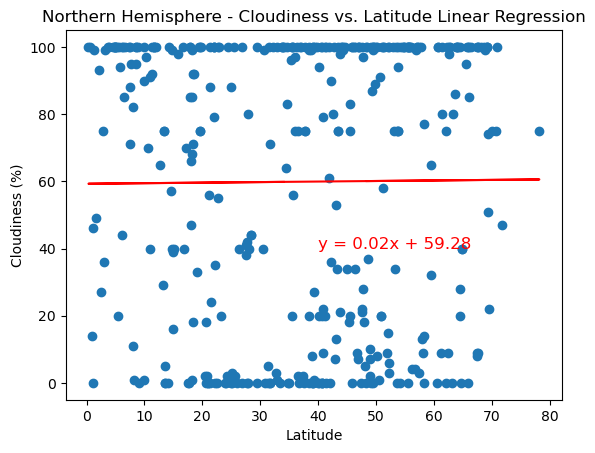

In [29]:

# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the equation of the line on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (40, 40), fontsize=12, color="red")

# Set plot properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Northern_Hemi_Cloudiness_Lat_LR.png")

# Show plot
plt.show()

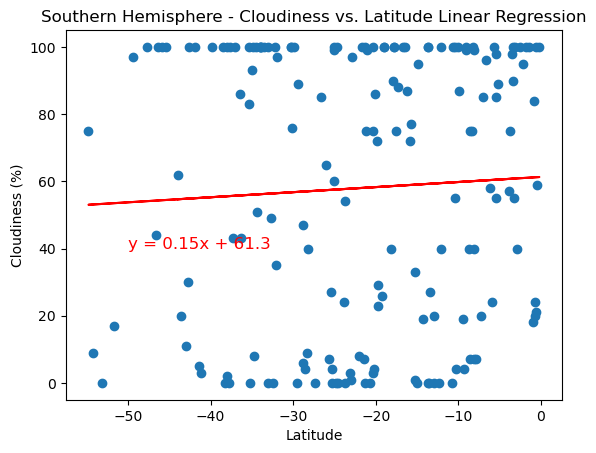

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the equation of the line on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (-50, 40), fontsize=12, color="red")

# Set plot properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Southern_Hemi_Cloudiness_Lat_LR.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

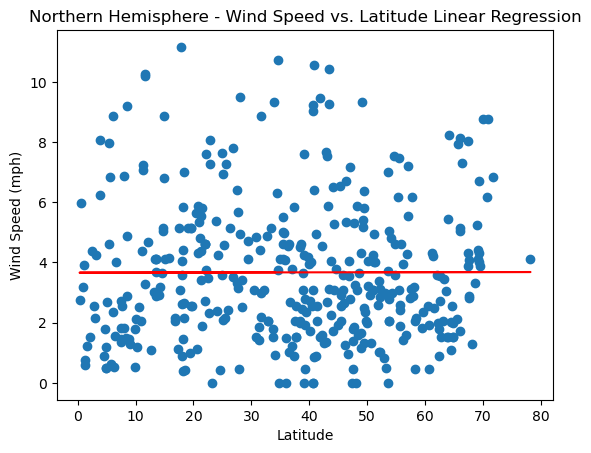

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the equation of the line on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (40, 25), fontsize=12, color="red")

# Set plot properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Northern_Hemi_WindSpeed_Lat_LR.png")

# Show plot
plt.show()

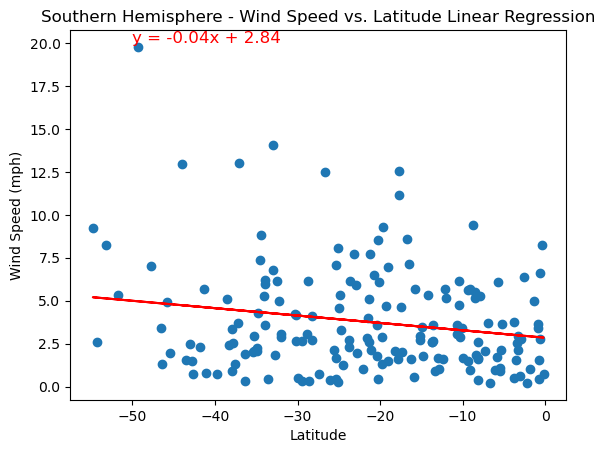

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the equation of the line on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (-50, 20), fontsize=12, color="red")

# Set plot properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Southern_Hemi_WindSpeed_Lat_LR.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE